## Проект "Пользовательские предпочтения в программе Яндекс.Афиша и популярные события осенью 2024 года"
- Автор: Родина Дарья 

## Цели и задачи проекта 
Цель: выявить инсайты об изменении пользовательских предпочтений и популярности событий осенью 2024 года, а также проверить гипотезы о разнице в поведении пользователей с мобильными и стационарными устройствами.

Задачи:
- предобработать данные и познакомиться сними, 
- провести анализ распределения заказов по сегментам и их сезонные изменения, 
- исследовать осеннюю активность пользователей 
- найти популярные события и партнеров 
- провести статистический анализ данных 
- подготовить аналитическую записку 

## Описание данных 

 final_tickets_orders_df.csv - информация обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных. Структура файла: 
 - оrder_id — уникальный идентификатор заказа;
 - user_id — уникальный идентификатор пользователя;
 - created_dt_msk — дата создания заказа (московское время);
 - created_ts_msk — дата и время создания заказа (московское время);
 - event_id — идентификатор мероприятия из таблицы events;
 - cinema_circuit — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет';
 - age_limit — возрастное ограничение мероприятия;
 - currency_code — валюта оплаты, например rub для российских рублей;
 - device_type_canonical — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных;
 - revenue — выручка от заказа;
 - service_name — название билетного оператора;
 - tickets_count — количество купленных билетов;
 - total — общая сумма заказа;
 - days_since_prev - количество дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск.
 
 final_tickets_events_df - информация о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия. Структура файла:
 - event_id — уникальный идентификатор мероприятия;
 - event_name — название мероприятия. Аналог поля event_name_code из исходной базы данных;
 - event_type_description — описание типа мероприятия;
 - event_type_main — основной тип мероприятия: театральная постановка, концерт и так далее;
 - organizers — организаторы мероприятия;
 - region_name — название региона;
 - city_name — название города;
 - venue_id — уникальный идентификатор площадки;
 - venue_name — название площадки;
 - venue_address — адрес площадки.
 
 final_tickets_tenge_df.csv - информация о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге. Структура файла:
 - nominal — номинал (100 тенге);
 - data — дата;
 - curs — курс тенге к рублю;
 - cdx — обозначение валюты (kzt).

 

## Содержимое проекта 




1. Название проекта 
2. Цели и задачи проекта 
3. Описание данных 
4. Содержимое проекта 
5. Загрузка данных и знакомство с ними 
6. Предобработка данных и подготовка их к исследованию
7. Исследовательский анализ данных
8. Статистический анализ данных 
9. Общий вывод и рекомендации 

## Загрузка данных и знакомство с ними 

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu

In [2]:
# создаем новый датафрейм, который включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных.
df_orders = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv')
display(df_orders.head())
display(df_orders.info())

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

None

В датафрейме df_orders отсутствуют пропуски во всех столбцах, кроме days_since_prev. Но, как мы знаем из информации из задания, то отсутствие какого-либо значения в данном поле означает, что покупки совсем не было. Все типы данных соответствуют. 

In [3]:
# создаем новый датафрейм
df_events = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv')
display(df_events.head())
display(df_events.info())

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


None

В датафрейме df_events отсутсвуют пропуски, а также все типы данных соответствуют. 

In [4]:
# создаем новый датафрейм
tenge_rub = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')
display(tenge_rub.head())
display(tenge_rub.info())

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


None

В датафрейме df_tickets все типы данные соответствуют, но поле data следует привести к более правильному типу. Также в этом датафрейме  отсутвуют пропуски.

Подытог: 

Пропуски в данных находятся только в столбце days_since_prev датафрейма df_orders. Все поля с датами и временем следует привести к :: timestamp, а также провести работы над выявлением и устранением явных и неявных дубликатов. 

## Предобработка данных и подготовка их к исследованию

In [5]:
merged_data = pd.merge(df_orders, df_events, on='event_id', how='left')
df = pd.merge(merged_data, tenge_rub, left_on='created_dt_msk', right_on='data', how='left')

In [6]:
# проверим данные на пропуски 
df.isna().sum()

order_id                      0
user_id                       0
created_dt_msk                0
created_ts_msk                0
event_id                      0
cinema_circuit                0
age_limit                     0
currency_code                 0
device_type_canonical         0
revenue                       0
service_name                  0
tickets_count                 0
total                         0
days_since_prev           21940
event_name                  238
event_type_description      238
event_type_main             238
organizers                  238
region_name                 238
city_name                   238
city_id                     238
venue_id                    238
venue_name                  238
venue_address               238
data                          0
nominal                       0
curs                          0
cdx                           0
dtype: int64

In [7]:
# заполняем пропуски столбцов пустыми строками 
df['event_name'] = df['event_name'].fillna('')
df['event_type_description'] = df['event_type_description'].fillna('')
df['event_type_main'] = df['event_type_main'].fillna('')
df['organizers'] = df['organizers'].fillna('')
df['region_name'] = df['region_name'].fillna('')
df['city_name'] = df['city_name'].fillna('')
df['city_id'] = df['city_id'].fillna('')
df['venue_id'] = df['venue_id'].fillna('')
df['venue_name'] = df['venue_name'].fillna('')
df['venue_address'] = df['venue_address'].fillna('')

В данных отсутсвуют пропуски 

In [8]:
# изучим категориальные колонки в датафрейме df_orders
cat_cols_orders = ['cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical', 'service_name', 'event_type_description', 'event_type_main', 'organizers', 'region_name', 'city_name', 'venue_name']
for i in cat_cols_orders:
    print(f"{i}:")
    display(df[i].value_counts(dropna=False))

cinema_circuit:


нет           289451
Другое          1261
КиноСити         122
Киномакс           7
Москино            7
ЦентрФильм         1
Name: cinema_circuit, dtype: int64

age_limit:


16    78579
12    62557
0     61487
6     52173
18    36053
Name: age_limit, dtype: int64

currency_code:


rub    285780
kzt      5069
Name: currency_code, dtype: int64

device_type_canonical:


mobile     232679
desktop     58170
Name: device_type_canonical, dtype: int64

service_name:


Билеты без проблем        63709
Лови билет!               41126
Билеты в руки             40364
Мой билет                 34843
Облачко                   26642
Лучшие билеты             17795
Весь в билетах            16849
Прачечная                 10273
Край билетов               6207
Тебе билет!                5228
Яблоко                     5039
Дом культуры               4502
За билетом!                2865
Городской дом культуры     2733
Show_ticket                2200
Мир касс                   2167
Быстробилет                2003
Выступления.ру             1616
Восьмёрка                  1118
Crazy ticket!               790
Росбилет                    539
Шоу начинается!             499
Быстрый кассир              381
Радио ticket                376
Телебилет                   321
КарандашРУ                  133
Реестр                      125
Билет по телефону            85
Вперёд!                      80
Дырокол                      74
Кино билет                   67
Цвет и б

event_type_description:


концерт                   112049
событие                    58605
спектакль                  50592
шоу                        13626
спорт                      12837
мюзикл                      9919
спортивное мероприятие      9074
балет                       5998
выставка                    5876
цирковое шоу                5327
фестиваль                   4273
опера                       1314
ёлка                         945
                             238
музыкальный спектакль        140
кукольный спектакль           13
экскурсия                      8
оперетта                       7
подарок                        4
снегурочка                     3
рок-мюзикл                     1
Name: event_type_description, dtype: int64

event_type_main:


концерты    115276
театр        67321
другое       65867
спорт        21911
стендап      13393
выставки      4854
ёлки          1989
               238
Name: event_type_main, dtype: int64

organizers:


№1531    9748
№2121    4738
№4054    4362
№4549    3972
№4837    3368
         ... 
№3932       1
№2680       1
№3309       1
№4426       1
№4998       1
Name: organizers, Length: 4294, dtype: int64

region_name:


Каменевский регион          91058
Североярская область        44049
Широковская область         16457
Медовская область           13901
Озернинский край            10476
                            ...  
Лесноярский край               19
Крутоводский регион            18
Верхозёрский край              11
Сосноводолинская область       10
Теплоозёрский округ             7
Name: region_name, Length: 82, dtype: int64

city_name:


Глиногорск      89446
Озёрск          43910
Радужсвет       13711
Радужнополье     8741
Верховино        6579
                ...  
Сосновогорск        1
Крутовичи           1
Озёроярск           1
Яблоновец           1
Верхозорье          1
Name: city_name, Length: 353, dtype: int64

venue_name:


Студия дизайна "Платформа" Инкорпорэйтед           9910
Картинная галерея "Светлячок" Лтд                  4406
Креативное пространство "Вдох" Лимитед             4257
Центр культурного наследия "Заряд" и партнеры      4099
Студия дизайна "Лестница" Лимитед                  4025
                                                   ... 
Центр искусства и культуры "Палитра" и партнеры       1
Модная академия "Эстет" Инк                           1
Научный центр "Светлый" и партнеры                    1
Центр современного искусства "Кружка" Инк             1
Театр "Речка" и партнеры                              1
Name: venue_name, Length: 3218, dtype: int64

В датафрейме df нет значений, которые могут означать пропуски. При этом только в cinema_circuit есть категория "нет", которая означает, что сеть кинотеатров была не применима. 

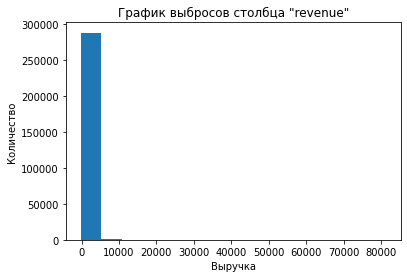

In [9]:
# изучим количественные значения датафрйема df_orders на наличие выбросов и на распределение
plt.hist(df['revenue'], bins=15)
plt.title('График выбросов столбца "revenue"')
plt.xlabel('Выручка')
plt.ylabel('Количество');

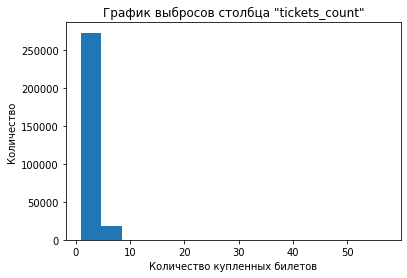

In [10]:
plt.hist(df['tickets_count'], bins=15)
plt.title('График выбросов столбца "tickets_count"')
plt.xlabel('Количество купленных билетов')
plt.ylabel('Количество');

На графиках наблюдается правосторонняя, или положительная, асимметрия — правый хвост распределения явно вытянут. Это указывает на присутствие высоких значений, которые оттягивают распределение вправо.

In [11]:
# Рассчитываем 99-й процентиль выручки отдельно для рублей и тенге
rub_revenue_99th = df.query("currency_code == 'rub'")['revenue'].quantile(0.99)
tenge_revenue_99th = df.query("currency_code == 'kzt'")['revenue'].quantile(0.99)

In [12]:
# Применяем фильтрацию
filtered_orders = df.copy()
filter_rub = filtered_orders.loc[(filtered_orders['currency_code'] == 'rub') & (filtered_orders['revenue'] > rub_revenue_99th), 'revenue']
filter_tenge = filtered_orders.loc[(filtered_orders['currency_code'] == 'kzt') & (filtered_orders['revenue'] > tenge_revenue_99th), 'revenue']

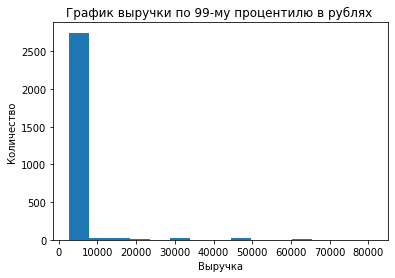

In [13]:
# визуализруем график выручки по 99-му процентилю в рублях 
plt.hist(filter_rub, bins=15)
plt.title('График выручки по 99-му процентилю в рублях ')
plt.xlabel('Выручка')
plt.ylabel('Количество');

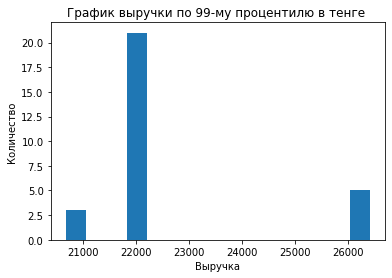

In [14]:
# визуализруем график выручки по 99-му процентилю в тенге 
plt.hist(filter_tenge, bins=15)
plt.title('График выручки по 99-му процентилю в тенге ')
plt.xlabel('Выручка')
plt.ylabel('Количество');

На графиках наблюдается правосторонняя, или положительная, асимметрия — правый хвост распределения явно вытянут. Это указывает на присутствие высоких значений, которые оттягивают распределение вправо. 

In [15]:
# проверим данные на явные дубликаты 
display(df.duplicated().sum())

0

Явные дубликаты в датафрейме отсутсвуют 

In [16]:
# проверим данные на неявные дубликаты 
df.duplicated(subset=['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id', 'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical', 'revenue', 'service_name', 'tickets_count', 'total']).sum()

40

In [17]:
# удаляем неявные дубликаты 
df = df.drop_duplicates(subset=['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id', 'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical', 'revenue', 'service_name', 'tickets_count', 'total'])

In [18]:
# меняем тип данных для даты и времени 
df['created_dt_msk'] = pd.to_datetime(df['created_dt_msk'], errors = 'coerce')
df['created_ts_msk'] = pd.to_datetime(df['created_ts_msk'], errors = 'coerce')
df['data'] = pd.to_datetime(df['data'], errors = 'coerce')

In [19]:
# снижаем размерность количественных данных 
df['order_id'] = pd.to_numeric(df['order_id'], downcast = 'integer')
df['event_id'] = pd.to_numeric(df['event_id'], downcast = 'integer')
df['age_limit'] = pd.to_numeric(df['age_limit'], downcast = 'integer')
df['tickets_count'] = pd.to_numeric(df['tickets_count'], downcast = 'integer')
df['revenue'] = pd.to_numeric(df['revenue'], downcast = 'float')
df['total'] = pd.to_numeric(df['total'], downcast = 'float')
df['days_since_prev'] = pd.to_numeric(df['days_since_prev'], downcast = 'float')
df['event_id']= pd.to_numeric(df['event_id'], downcast = 'integer')
df['city_id']= pd.to_numeric(df['city_id'], downcast = 'integer')
df['venue_id']= pd.to_numeric(df['venue_id'], downcast = 'integer')
df['nominal'] =  pd.to_numeric(df['nominal'], downcast = 'integer')
df['curs'] =  pd.to_numeric(df['curs'], downcast = 'float')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290809 entries, 0 to 290848
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290809 non-null  int32         
 1   user_id                 290809 non-null  object        
 2   created_dt_msk          290809 non-null  datetime64[ns]
 3   created_ts_msk          290809 non-null  datetime64[ns]
 4   event_id                290809 non-null  int32         
 5   cinema_circuit          290809 non-null  object        
 6   age_limit               290809 non-null  int8          
 7   currency_code           290809 non-null  object        
 8   device_type_canonical   290809 non-null  object        
 9   revenue                 290809 non-null  float32       
 10  service_name            290809 non-null  object        
 11  tickets_count           290809 non-null  int8          
 12  total                   290809

In [21]:
# создаем новый столбец с выручкой по одной валюте 
df['revenue_rub'] = df['revenue']
nominal_rate = df['curs'] 
df.loc[df['currency_code'] != 'rub', 'revenue_rub'] = (df['revenue'] * nominal_rate)/ 100
df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.939941,...,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.697201,kzt,1521.939941
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.450012,...,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,100,18.341900,kzt,289.450012
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.569946,...,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,100,19.647499,kzt,1258.569946
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.490000,...,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,100,18.500999,kzt,8.490000
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.410034,...,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,100,19.664801,kzt,1390.410034


In [22]:
# создаем новый столбец с выручкой с продажи одного билета на мероприятие
df['one_ticket_revenue_rub'] = round(df['revenue_rub'] / df['tickets_count'], 2)


In [23]:
# создаем новый столбец с информацией о месяце, в который был оформлен заказ 
df['month'] = df['created_dt_msk'].dt.month

In [24]:
# создаем новый столбец с временем года 
def season(month):
    if month in [12, 1, 2]:
        return 'зима'
    elif month in [3, 4, 5]:
        return 'весна'
    elif month in [6, 7, 8]:
        return 'лето'
    else:
        return 'осень'
df['season'] = df['month'].apply(season)

На этапе предобработки данных мы: 
- для удобства работы с данными соединили все датафреймы в единый,
- проверили и поработли с данными над пропусками,
- проверили данные на явные и невяные дубликаты,
- удалили 40 неявных дубликатов,
- поменяли типы данных для даты и времени, а также поменяли размерность количественных данных,
- создали новые столбцы revenue_rub, one_ticket_revenue_rub, month и season
- изучили данные столбца выручки и выявили выбросы и отрицательные значения, которые впоследствии отфильтровали

## Исследовательский анализ данных 

### Анализ распределения заказов по сегментам и их сезонные изменения

<b>Для каждого месяца найдем количество заказов <b>

In [25]:
# для каждого месяца найдем количество заказов
month_orders = df.groupby('month')['order_id'].count()

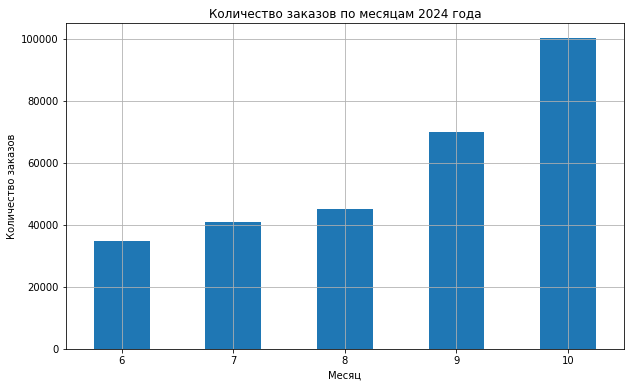

In [26]:
# построим диаграмму 
month_orders.plot(kind = 'bar',
               title = 'Количество заказов по месяцам 2024 года',
               legend = False,
               rot = 0,
               figsize = (10, 6))
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.grid()
plt.show()

 Как было показано на дашборде, на графике также видно, что в данных наблюдается сезонность — осенью количество заказов увеличивается. 

 <b>Для осеннего и летнего периодов сравним распределение заказов билетов по разным категориям <b>

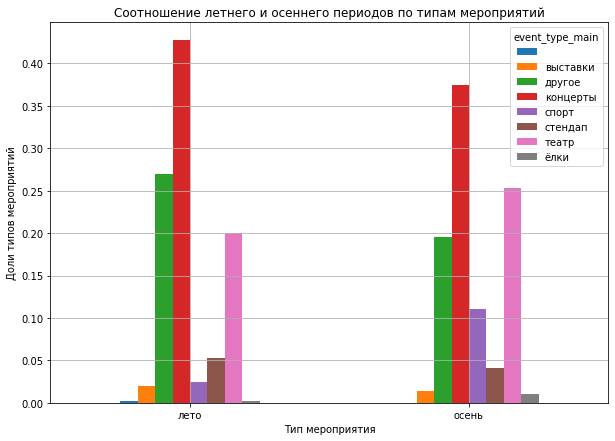

In [27]:
# для летнего и осеннего периодов сравним распределение заказов билетов по типам мероприятия 
ev = df.groupby('season')['event_type_main'].value_counts(normalize=True).sort_values(ascending=False).unstack(fill_value=0)
ev.plot(kind='bar',
               title=f'Соотношение летнего и осеннего периодов по типам мероприятий',
               legend=True,
               ylabel='Доли типов мероприятий',
               xlabel='Тип мероприятия',
               rot=0,
               figsize=(10, 7))
plt.grid()
plt.show()

По графику видно, что в летнем периоде преобладают такие типы мероприятий, как: выставки, концерты, стендап и другое. В то время как осенью: спорт, театр и елки.

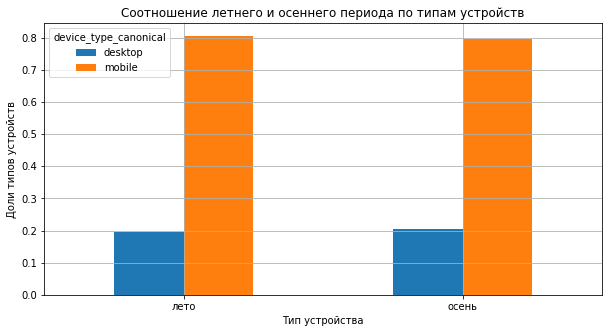

In [28]:
# для летнего и осеннего периодов сравним распределение заказов билетов по типам устройств
dev = df.groupby('season')['device_type_canonical'].value_counts(normalize=True).sort_values(ascending=False).unstack(fill_value=0)
dev.plot(kind='bar',
               title=f'Соотношение летнего и осеннего периода по типам устройств',
               legend=True,
               ylabel='Доли типов устройств',
               xlabel='Тип устройства',
               rot=0,
               figsize=(10, 5))
plt.grid()
plt.show()

По графику выше видно, что как летом, так и осенью пользователи гораздо больше пользуются мобильными телефонами.

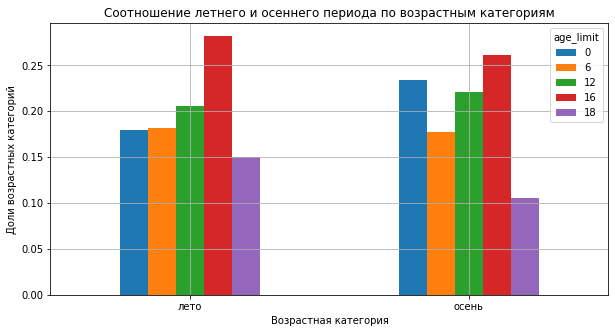

In [29]:
# для летнего и осеннего периодов сравним распределение заказов билетов по возрастным категориям 
age_l = df.groupby('season')['age_limit'].value_counts(normalize=True).sort_values(ascending=False).unstack(fill_value=0)
age_l.plot(kind='bar',
               title=f'Соотношение летнего и осеннего периода по возрастным категориям',
               legend=True,
               ylabel='Доли возрастных категорий',
               xlabel='Возрастная категория',
               rot=0,
               figsize=(10, 5))
plt.grid()
plt.show()

По графику "Соотношение летнего и осеннего периода по возрастным категориям" можно наблюдать, что летом больше всего купленных билетов с ограничением по возрасту 16 лет, а осенью 0+. При этом и осенью и летом меньше всего купленных билетов с ограничением 18+ .

<b>Изучим изменение выручки с продажи одного билета в зависимости от типа мероприятия летом и осенью.<b>

In [30]:
# Выделим данные для лета и осени
summer_data = df[df['season'] == 'лето']
autumn_data = df[df['season'] == 'осень']

In [31]:
# Средний доход с одного билета летом
avg_summer_revenue_per_ticket = summer_data.groupby('event_type_main')['one_ticket_revenue_rub'].mean()

# Средний доход с одного билета осенью
avg_autumn_revenue_per_ticket = autumn_data.groupby('event_type_main')['one_ticket_revenue_rub'].mean()

In [32]:
# Процентное изменение средней выручки с одного билета осенью по сравнению с летом
percent_change = ((avg_autumn_revenue_per_ticket - avg_summer_revenue_per_ticket) / avg_summer_revenue_per_ticket) * 100
percent_change

event_type_main
            316.861481
выставки      5.381863
другое       -4.925875
концерты    -10.128806
спорт        -3.646069
стендап      10.081800
театр       -17.734367
ёлки        -15.154224
Name: one_ticket_revenue_rub, dtype: float32

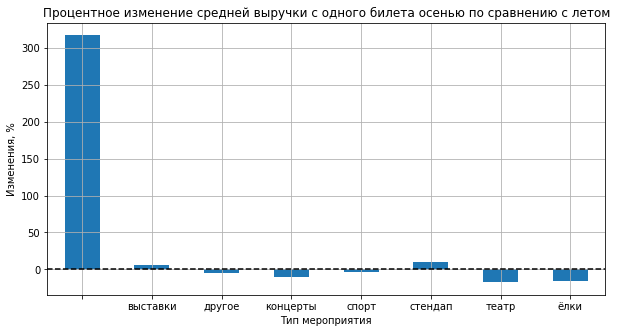

In [33]:
percent_change.plot(kind='bar',
               title=f'Процентное изменение средней выручки с одного билета осенью по сравнению с летом',
               legend=False,
               ylabel='Изменения, %',
               xlabel='Тип мероприятия',
               rot=0,
               figsize=(10, 5))
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

 По графику "Процентное изменение средней выручки с одного билета осенью по сравнению с летом" видно, что такие типы мероприятий, как концерты, спорт, театр и елки упали в выручке, а выставки и стендап выросли. 

<b> В данных наблюдается сезонность — осенью количество заказов увеличивается. В летнем периоде преобладают такие типы мероприятий, как: выставки, концерты, стендап и другое. В то время как осенью: спорт, театр и елки.  Как летом, так и осенью пользователи очень активно пользуются мобильными телефонами. Летом больше всего купленных билетов с ограничением по возрасту 16 лет, а осенью 0+. При этом и осенью и летом меньше всего купленных билетов с ограничением 18+. Осенью выручка с одного билета больше всего выросла в категории "спорт", а меньше всего в категории "елки". <b>

### Осенняя активность пользователей

Изучим активность пользователей осенью 2024 года.

Проанализируем динамику изменений по дням для:
- общего числа заказов;
- количества активных пользователей DAU;
- среднего числа заказов на одного пользователя;
- средней стоимости одного билета.

In [34]:
# создаем новую сводную таблицу с рассчетами по дням общего числа заказов, количества активных пользователей, среднего числа заказов на одного пользователя и средней стоимости одного билета 
daily_metrics = (
    autumn_data.groupby(autumn_data['created_dt_msk'].dt.date)
    .agg(
        orders_per_day=('order_id', 'count'),
        active_users_per_day=('user_id', 'nunique'))
    .assign(avg_orders_per_user=lambda x: x['orders_per_day'] / x['active_users_per_day'])
    .reset_index())

# агрегирование цены отдельного билета
ticket_prices = autumn_data.groupby(autumn_data['created_dt_msk'].dt.date)['one_ticket_revenue_rub'].mean()
daily_metrics = daily_metrics.assign(average_ticket_price=ticket_prices.values)
daily_metrics

,created_dt_msk,orders_per_day,active_users_per_day,avg_orders_per_user,average_ticket_price
0,2024-09-01,1348,569,2.369069,208.117722
1,2024-09-02,1391,580,2.398276,195.536148
2,2024-09-03,5124,783,6.544061,82.095764
3,2024-09-04,1785,688,2.594477,184.003296
4,2024-09-05,1960,745,2.630872,194.512985
...,...,...,...,...,...
56,2024-10-27,2865,1039,2.757459,190.688629
57,2024-10-28,2859,988,2.893725,176.783844
58,2024-10-29,2888,1005,2.873632,190.050110
59,2024-10-30,2960,1050,2.819048,188.944687


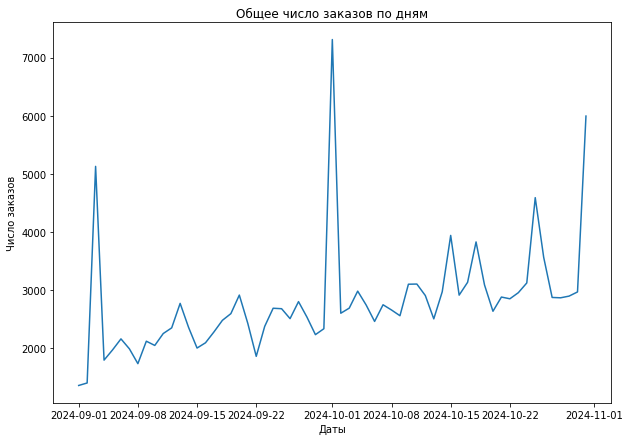

In [35]:
# строим линейный график для отоброжения общего количества заказов по дням 
plt.figure(figsize=(10, 7))
sns.lineplot(data=daily_metrics, x="created_dt_msk", y="orders_per_day")
plt.title("Общее число заказов по дням")
plt.xlabel("Даты")
plt.ylabel("Число заказов")
plt.show()

<Figure size 720x504 with 0 Axes>

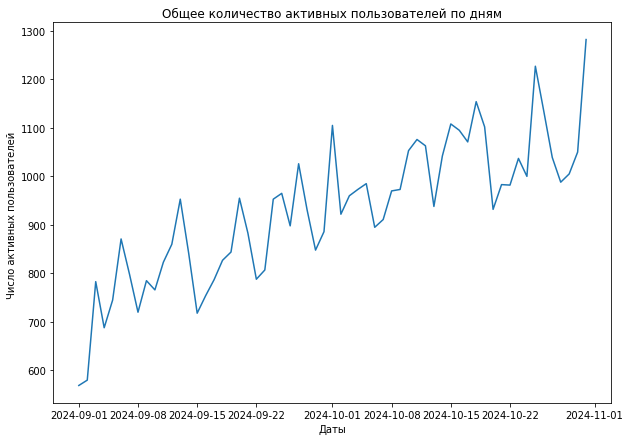

In [36]:
# строим линейный график для отоброжения общего количества активных пользователей по дням 
plt.figure(figsize=(10, 7))
plt.figure(figsize=(10, 7))
sns.lineplot(data=daily_metrics, x="created_dt_msk", y="active_users_per_day")
plt.title("Общее количество активных пользователей по дням")
plt.xlabel("Даты")
plt.ylabel("Число активных пользователей ")
plt.show()

<Figure size 720x504 with 0 Axes>

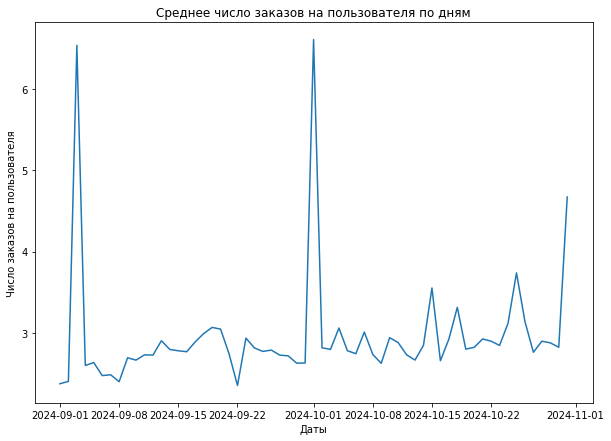

In [37]:
# строим линейный график для отоброжения среднего числа заказов на пользователя по дням 
plt.figure(figsize=(10, 7))
plt.figure(figsize=(10, 7))
sns.lineplot(data=daily_metrics, x="created_dt_msk", y="avg_orders_per_user")
plt.title("Среднее число заказов на пользователя по дням")
plt.xlabel("Даты")
plt.ylabel("Число заказов на пользователя")
plt.show()

<Figure size 720x504 with 0 Axes>

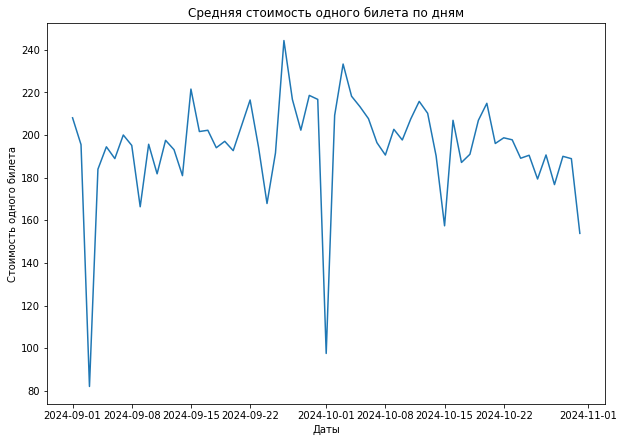

In [38]:
# строим линейный график для отоброжения средней стоимости одного билета по дням 
plt.figure(figsize=(10, 7))
plt.figure(figsize=(10, 7))
sns.lineplot(data=daily_metrics, x="created_dt_msk", y="average_ticket_price")
plt.title("Средняя стоимость одного билета по дням")
plt.xlabel("Даты")
plt.ylabel("Стоимость одного билета")
plt.show()

<b>По графикам видно, что: 
- динамика числа заказов демонстрирует стабильный рост на протяжении всего периода исследования, однако в начале сентября и октября имеются скачки с резким увеличением числа заказов,
- количество активных пользователей растёт вместе с числом заказов, демонстрируя положительную корреляцию,
- показатель среднего числа заказов на пользователя стабилен на уровне около 2.5 заказов на человека в сутки, что свидетельствует о равномерном распределении покупок среди пользователей. При этом стоит также отметить, что в начале сентября и октября также имеются скачки с резким увеличением числа заказов.
- средняя стоимость одного билета в начале сентября и октября резко падают, в остальном исследуемом периоде значение стабильно колеблется между 100-140.<b>

Изучим недельную цикличность.

In [39]:
weekly_cyc = daily_metrics.copy()
weekly_cyc['week_day'] = weekly_cyc['created_dt_msk'].apply(lambda d: d.weekday())

# вычислим среднее число заказов и пользователей по каждому дню недели
weekly_avg = weekly_cyc.groupby('week_day')[['orders_per_day', 'active_users_per_day']].mean().reset_index()

# отметим дни недели 
week_days_map = {0:'Понедельник', 1:'Вторник', 2:'Среда', 3:'Четверг', 4:'Пятница', 5:'Суббота', 6:'Воскресенье'}
weekly_avg['week_day'] = weekly_avg['week_day'].map(week_days_map)


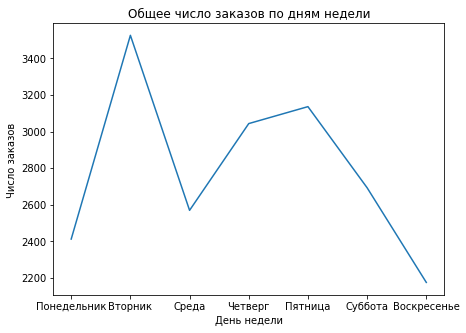

In [40]:
# строим линейный график для отоброжения общего числа заказов по дням недели 
plt.figure(figsize=(7, 5))
sns.lineplot(data=weekly_avg, x="week_day", y="orders_per_day")
plt.title("Общее число заказов по дням недели")
plt.xlabel("День недели")
plt.ylabel("Число заказов ")
plt.show()

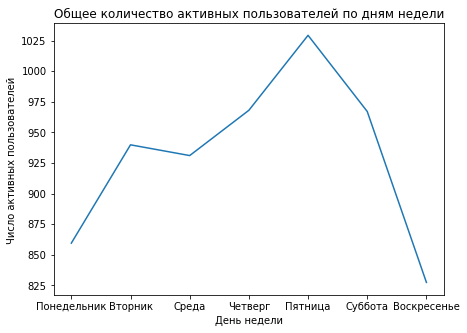

In [41]:
# строим линейный график для отоброжения общего количества активных пользователей по дням недели
plt.figure(figsize=(7, 5))
sns.lineplot(data=weekly_avg, x="week_day", y="active_users_per_day")
plt.title("Общее количество активных пользователей по дням недели")
plt.xlabel("День недели")
plt.ylabel("Число активных пользователей ")
plt.show()

 <b>По результатам анализа видно чёткое различие между рабочим периодом и выходными днями. Активность значительно снижается в субботу и воскресенья, возвращаясь обратно к началу следующей недели. Это значит, что стратегия маркетинга должна учитывать такие колебания и стимулировать интерес в период низкой активности, предлагая специальные акции или скидки именно в выходные дни.
 
Таким образом, проанализировав поведение пользователей осенью 2024 года, мы можем выделить основные закономерности и тенденции, влияющие на покупку билетов онлайн, что позволит скорректировать маркетинговую стратегию сервиса и повысить эффективность взаимодействия с клиентами.<b>

###  Популярные события и партнёры

Для каждого региона посчитаем уникальное количество мероприятий и общее число заказов.

In [42]:
# считаем уникальное количество мероприятий и общее число заказов для каждого региона
region_analys = autumn_data.groupby('region_name').agg({'event_id' : 'nunique',
                                                       'order_id' : 'count'}).rename(columns = {'event_id' : 'unique_event',
                                                                                    'order_id' : 'count_order_id'})
region_analys

,unique_event,count_order_id
region_name,,
,4,22
Белоярская область,44,132
Берестовский округ,25,324
Берёзовская область,42,348
Боровлянский край,76,1240
...,...,...
Шанырский регион,17,658
Широковская область,803,8739
Яблоневская область,432,4223


In [43]:
# считаем долю проводимых мероприятий в каждом регионе от общего числа мероприятий 
events_share = round(region_analys['unique_event'] / region_analys['unique_event'].sum(), 3)
events_share.sort_values(ascending = False).head(5)

region_name
Каменевский регион      0.248
Североярская область    0.165
Широковская область     0.050
Светополянский округ    0.048
Речиновская область     0.033
Name: unique_event, dtype: float64

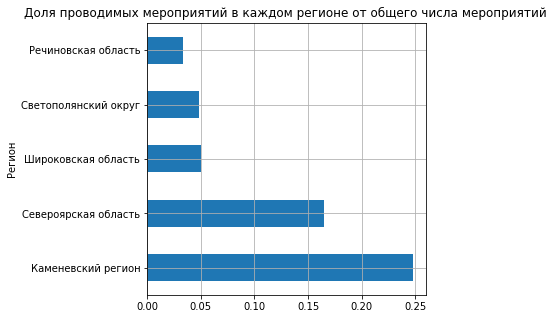

In [44]:
#строим столбчатую диаграмму 
events_share.sort_values(ascending = False).head(5).plot(kind = 'barh',
               title = 'Доля проводимых мероприятий в каждом регионе от общего числа мероприятий ',
               legend = False,
               xlabel = 'Регион',
               ylabel = 'Доля от общего числа мероприятий',
               rot = 0,
               figsize = (5, 5))
plt.grid()
plt.show()

In [45]:
# считаем долю заказов в каждом регионе от общего числа заказов
order_share = round(region_analys['count_order_id'] / region_analys['count_order_id'].sum(), 3)
order_share.sort_values(ascending = False).head(5)

region_name
Каменевский регион      0.279
Североярская область    0.123
Медовская область       0.071
Широковская область     0.051
Озернинский край        0.045
Name: count_order_id, dtype: float64

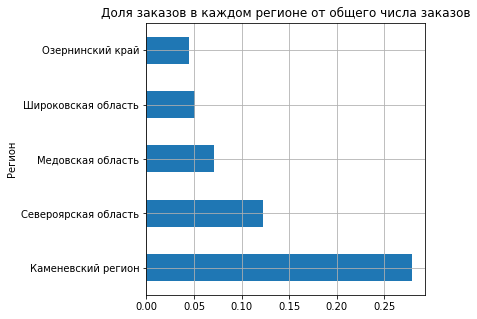

In [46]:
#строим столбчатую диаграмму 
order_share.sort_values(ascending = False).head(5).plot(kind = 'barh',
               title = 'Доля заказов в каждом регионе от общего числа заказов',
               legend = False,
               xlabel = 'Регион',
               ylabel = 'Доля от общего числа заказов',
               rot = 0,
               figsize = (5, 5))
plt.grid()
plt.show()

In [47]:
# выводим топ-10 регионов, в которых проводится больше всего мероприятий 
region_analys.sort_values(by = 'unique_event', ascending = False).head(10)

,unique_event,count_order_id
region_name,,
Каменевский регион,3946,47512
Североярская область,2622,20897
Широковская область,803,8739
Светополянский округ,764,4839
Речиновская область,529,3576
Серебринская область,456,4477
Яблоневская область,432,4223
Тепляковская область,420,2486
Горицветская область,406,3234


<b>Самые большие доли от общего числа мероприятий находятся в Каменевский регионе, Североярской области и Широковской области. 
Самые большие доли заказов от их общего числа находятся также в Каменевский регионе, Североярской области и Медовской области. 
Больше всего мероприятий проводится в Каменевском регионе и Североярской области. <b>

Для каждого билетного партнёра посчитаем общее число уникальных мероприятий, обработанных заказов и суммарную выручку с заказов билетов.

In [48]:
# считаем число уникальных мероприятий, обработанных заказов и суммарную выручку для каждого партнера 
partner_analys = autumn_data.groupby('service_name').agg({'event_id' : 'nunique',
                                                         'order_id' : 'count',
                                                         'revenue_rub' : 'sum'}).rename(columns = {'event_id' : 'unique_event_id',
                                                                                                  'order_id' : 'count_order_id',
                                                                                                  'revenue_rub' : 'sum_revenue_rub'})

In [49]:
partner_analys['sum_revenue_rub'] = partner_analys['sum_revenue_rub'].round()
partner_analys.head()

,unique_event_id,count_order_id,sum_revenue_rub
service_name,,,
Crazy ticket!,178,550,319452.0
Show_ticket,204,1351,1101161.0
Билет по телефону,10,50,37808.0
Билеты без проблем,2855,32786,13619601.0
Билеты в интернете,1,4,548.0


In [50]:
# считаем долю меропритий для каждого партнера от общего числа 
events_2share = round(partner_analys['unique_event_id'] / partner_analys['unique_event_id'].sum(), 3)
events_2share.sort_values(ascending = False).head(5)

service_name
Лови билет!           0.209
Билеты без проблем    0.165
Билеты в руки         0.143
Облачко               0.081
Лучшие билеты         0.080
Name: unique_event_id, dtype: float64

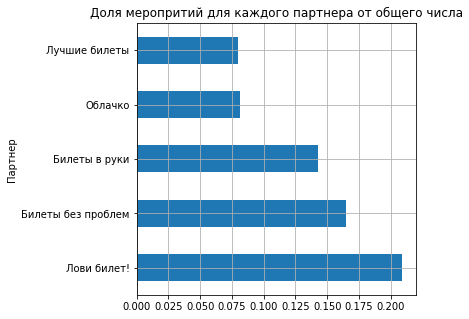

In [51]:
#строим столбчатую диаграмму 
events_2share.sort_values(ascending = False).head(5).plot(kind = 'barh',
               title = 'Доля меропритий для каждого партнера от общего числа',
               legend = False,
               xlabel = 'Партнер',
               ylabel = 'Доля мероприятий от общего числа',
               rot = 0,
               figsize = (5, 5))
plt.grid()
plt.show()

In [52]:
# считаем долю обработанных заказов для каждого партнера от общего числа 
order_2share = round(partner_analys['count_order_id'] / partner_analys['count_order_id'].sum(), 3)
order_2share.sort_values(ascending = False).head(5)

service_name
Билеты без проблем    0.193
Лови билет!           0.152
Билеты в руки         0.151
Мой билет             0.116
Облачко               0.092
Name: count_order_id, dtype: float64

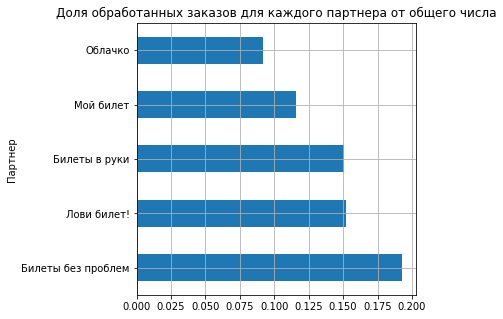

In [53]:
#строим столбчатую диаграмму 
order_2share.sort_values(ascending = False).head(5).plot(kind = 'barh',
               title = 'Доля обработанных заказов для каждого партнера от общего числа',
               legend = False,
               xlabel = 'Партнер',
               ylabel = 'Доля обработанных заказов от общего числа',
               rot = 0,
               figsize = (5, 5))
plt.grid()
plt.show()

In [54]:
# считаем долю суммарной выручки для каждого партнера от общего числа 
revenue_share =  round(partner_analys['sum_revenue_rub'] / partner_analys['sum_revenue_rub'].sum(), 3)
revenue_share.sort_values(ascending= False).head(5)

service_name
Билеты без проблем    0.153
Облачко               0.140
Мой билет             0.133
Лови билет!           0.120
Весь в билетах        0.115
Name: sum_revenue_rub, dtype: float32

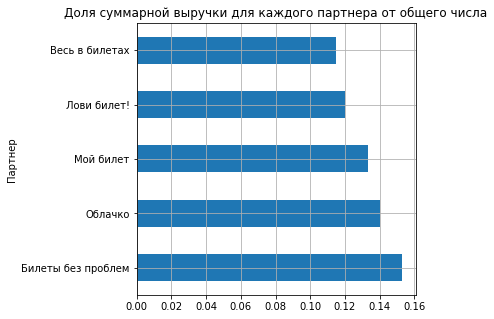

In [55]:
#строим столбчатую диаграмму 
revenue_share.sort_values(ascending = False).head(5).plot(kind = 'barh',
               title = 'Доля суммарной выручки для каждого партнера от общего числа',
               legend = False,
               xlabel = 'Партнер',
               ylabel = 'Доля суммарной выручки от общего числа',
               rot = 0,
               figsize = (5, 5))
plt.grid()
plt.show()

 <b>Самые большие доли мероприятий у таких партнеров как: "Лови билет!", "Билеты без проблем" и "Билеты в руки".
Больше всего долей по обработанным заказов среди парнеров у "Билеты без проблем", "Билеты в руки" и "Лови билет!".
И по суммарной выручке больше всего долей у таких партнеров: "Билеты без проблем", "Лови билет!" и "Облачко".
Соответственно среди всех категорий в топе лучших партнеров находятся "Билеты без проблем" и "Лови билет!". <b>

## Статистический анализ данных

Проверим две гипотезы, которые предполагают большую активность пользователей мобильных устройств:
- Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
- Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

In [56]:
# формируем данные 
mobile_d = autumn_data.query("device_type_canonical == 'mobile'")
desktop_d = autumn_data.query("device_type_canonical == 'desktop'")

In [57]:
# формируем метрики по гипотезе среднего количества заказов на одного пользователя 
orders_mobile = mobile_d.groupby('user_id')['order_id'].count()
orders_desktop = desktop_d.groupby('user_id')['order_id'].count()

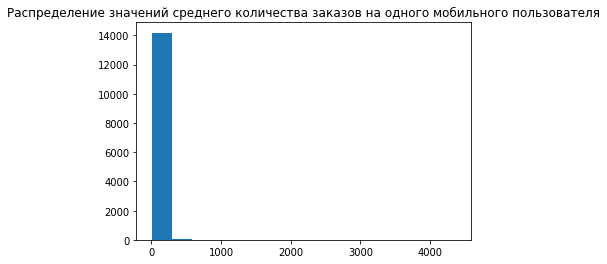

In [58]:
# исследуем выбросы для мобильных пользователей
plt.hist(orders_mobile, bins =15)
plt.title('Распределение значений среднего количества заказов на одного мобильного пользователя');

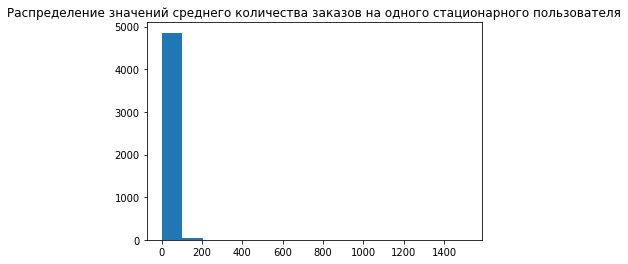

In [59]:
# исследуем выбросы для стационарных пользователей
plt.hist(orders_desktop, bins =15)
plt.title('Распределение значений среднего количества заказов на одного стационарного пользователя');

На графиках наблюдается правосторонняя, или положительная, асимметрия — правый хвост распределения явно вытянут. Это указывает на присутствие высоких значений, которые оттягивают распределение вправо. 

Исходя из вышеисследуемого, мы не можем использовать параметрические тесты для проверки гипотезы, так как распределение не является нормальным. Именно потому, что присутствуют выбросы, далее применим тест Манна-Уитни, который устойчив к выбросам, так как использует ранги, а не абсолютные значения. 

Формулируем гипотезы: 

Н0 (нулевая гипотеза): среднее количество заказов на одного пользователя мобильных устройств не больше среднему количеству заказов на одного пользователя стационарных устройств. 

Н1(альтернативная гипотеза): среднее количество заказов на одного пользователя мобильных устройств больше, чем у пользователей стационарных устройств. 

In [60]:
# применяем тест Манна-Уитни 
alpha = 0.05 
stat_mw, p_value_mw = mannwhitneyu(
    orders_mobile, 
    orders_desktop, 
    alternative='greater'
) 
if p_value_mw > alpha:
    print(f'pvalue={p_value_mw} > {alpha}')
    print('Нулевая гипотеза не отвергается! Среднее количество заказов на одного пользователя мобильных устройств не больше среднему количеству заказов на одного пользователя стационарных устройств')
else:
    print(f'pvalue={p_value_mw} < {alpha}')
    print('Нулевая гипотеза отвергается! Среднее количество заказов на одного пользователя мобильных устройств больше, чем у пользователей стационарных устройств, и это различие статистически значимо.')

pvalue=1.34357399521509e-07 < 0.05
Нулевая гипотеза отвергается! Среднее количество заказов на одного пользователя мобильных устройств больше, чем у пользователей стационарных устройств, и это различие статистически значимо.


Проверим вторую гипотезу

In [61]:
# формируем метрику 
time_order_mobile = mobile_d[mobile_d['days_since_prev'].notnull()]['days_since_prev']
time_order_desktop = desktop_d[desktop_d['days_since_prev'].notnull()]['days_since_prev']

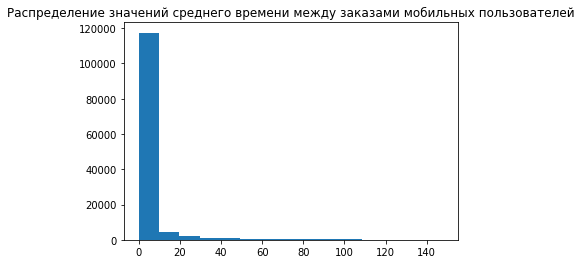

In [62]:
# исследуем распределение для мобильных пользователей
plt.hist(time_order_mobile, bins =15)
plt.title('Распределение значений среднего времени между заказами мобильных пользователей');

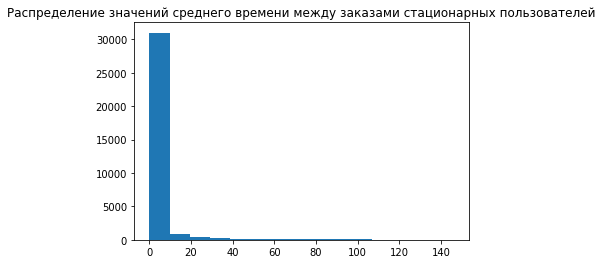

In [63]:
# исследуем распределение для стационарных пользователей
plt.hist(time_order_desktop, bins =15)
plt.title('Распределение значений среднего времени между заказами стационарных пользователей');

На графиках наблюдается правосторонняя, или положительная, асимметрия — правый хвост распределения явно вытянут. Это указывает на присутствие высоких значений, которые оттягивают распределение вправо. 

Исходя из вышеисследуемого, мы не можем использовать параметрические тесты для проверки гипотезы, так как распределение не является нормальным. Именно потому, что в данных присутствуют выбросы, далее применим тест Манна-Уитни, который устойчив к выбросам, так как использует ранги, а не абсолютные значения. 

Формулируем гипотезы: 

Н0(нулевая гипотеза): среднее время между заказами пользователей мобильных устройств не больше среднему времени между заказами пользователей стационарных устройств.

Н1(альтернативная гипотеза): среднее время между заказами пользователей мобильных устройств больше, чем у пользователей стационарных устройств. 

In [64]:
# применяем тест Манна-Уитни 
alpha = 0.05 
stat_mw, p_value_mw = mannwhitneyu(
    time_order_mobile, 
    time_order_desktop, 
    alternative='greater'
) 
if p_value_mw > alpha:
    print(f'pvalue={p_value_mw} > {alpha}')
    print('Нулевая гипотеза не отвергается! Среднее время между заказами пользователей мобильных устройств не больше среднему времени между заказами пользователей стационарных устройств.')
else:
    print(f'pvalue={p_value_mw} < {alpha}')
    print('Нулевая гипотеза отвергается! Среднее время между заказами пользователя мобильных устройств больше, чем у пользователей стационарных устройств, и это различие статистически значимо.')

pvalue=6.751629011767284e-93 < 0.05
Нулевая гипотеза отвергается! Среднее время между заказами пользователя мобильных устройств больше, чем у пользователей стационарных устройств, и это различие статистически значимо.


<b> t-тест был выполнен по типу Манна-Уитни, так как для него не требуется нормальное распределение выборочного среднего. Уровень значимости выбрали 0.05, так как оно самое часто используемое значение в практике. 

Проверив обе гипотезы, мы получили результаты, позволяющие подтвердить утверждения коллег из продуктового отдела. По результатам теста: 
- Среднее количество заказов на одного пользователя мобильных устройств больше, чем у пользователей стационарных устройств, то есть нулевая гипотеза не находит своего подтверждения, так как p-value = 3.36е-06, что значительно меньше уровня значимости. 
- Среднее время между заказами пользователя мобильных устройств больше, чем у пользователей стационарных устройств, то есть также нулевая гипотеза не находит своего подтверждения, так как value = 4.97е-108, что сильно меньше уровня значимости. 
    <b>

## Общий вывод и рекомендации 

### Информация о данных 

Проект основан на анализе набора данных о покупках билетов, совершенных летом и осенью 2024 года. Были использованы три источника данных: сведения о заказах билетов, информация о мероприятиях и курсы рубля к тенге. Объединённые данные позволили провести глубокий анализ поведения пользователей, оценить популярность различных мероприятий, распределение активности по регионам и партнерами, а также исследовать влияние устройств на покупательские привычки.

### Основные результаты анализа 

- Популярность мероприятий: осенью наблюдался повышенный интерес к театру и концерту, что подтверждает устойчивость культурных предпочтений аудитории. Стоимость среднего чека осталась практически неизменной, свидетельствуя о стабильности цен и привычных форматов потребления культуры.
- Изменение активности пользователей: наибольшее количество заявок поступало в рабочие дни, особенно ближе к концу недели. Суббота и воскресенье показали снижение активности покупателей, что характерно для многих сфер ритейла.
- Регион и партнерство: лидерами стали такие регионы, как Каменевский и Североярский, а также известные билетные операторы, как "Билеты без проблем " и "Лови билет!" . Тем не менее существуют значительные различия в активности между регионами, подчеркивая важность локализации усилий.
- Проверка гипотез: Первая гипотеза подтвердила предположение о повышенной активности пользователей мобильных устройств в плане частоты заказов. Во второй гипотезе было также статистически доказано, что среднее время между заказами пользователя мобильных устройств больше, чем у пользователей стационарных устройств.

### Рекомендации 

 - Следует продолжить работу над повышением лояльности пользователей мобильных платформ путем внедрения персонализированных рекомендаций и акций.
 - Рекомендуется развивать маркетинговые кампании, направленные на привлечение внимания пользователей в периоды снижения активности (например, выходные дни).
 - Стоит уделить особое внимание небольшим городам и областям, разрабатывая локальные рекламные кампании и сотрудничество с местными организаторами мероприятий.
 - Необходимо отслеживать изменения популярности новых видов мероприятий, регулярно обновляя список популярных направлений и адаптируя контент.


Объединяя полученные знания, проект даёт важные подсказки для дальнейшей работы команды продукта и маркетологов, позволяя оптимизировать подходы к привлечению и удержанию клиентов, увеличению прибыли и улучшению качества обслуживания пользователей.